In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
kernel = np.array([
    [0.0, 0.5, 0.0],
    [0.5, 1.0, 0.5],
    [0.0, 0.5, 0.0]])

In [3]:
image = np.array([
    [0.5, 0.6, 0.5, 0.4, 0.2],
    [0.7, 0.6, 0.6, 0.1, 0.4],
    [0.3, 0.1, 0.3, 0.2, 1.0],
    [0.5, 0.1, 0.8, 0.5, 1.0],
    [0.2, 0.3, 0.4, 0.4, 0.6]
])

<IPython.core.display.Javascript object>


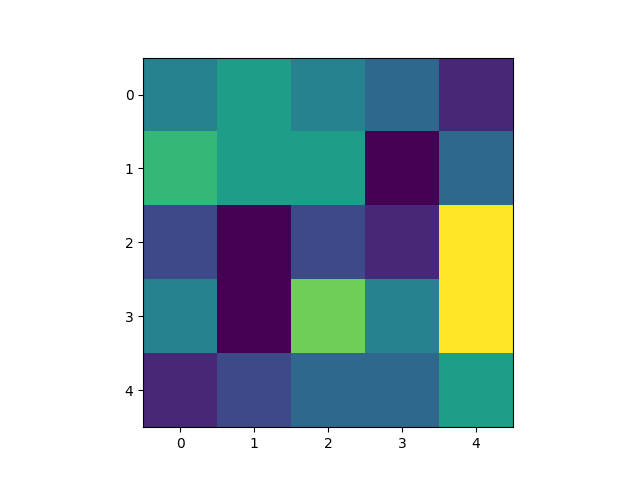

In [4]:
plt.figure()
plt.imshow(image)

In [5]:
expected = np.array([
    [1.80, 1.70, 1.60, 0.85, 1.00],
    [1.70, 1.60, 1.35, 0.90, 1.10],
    [1.00, 0.75, 1.15, 1.15, 1.90],
    [0.85, 0.95, 1.45, 1.70, 2.30],
    [1.00, 0.70, 1.55, 1.40, 2.00]
])

In [6]:
class BorderStrategyReflect101(object):
    def __init__(self, data):
        self.__data = data
        self.__xmax = data.shape[0]-1
        self.__ymax = data.shape[1]-1
        
    def _wrap(self, v, vmax):
        if (v // vmax) % 2 == 0:
            return v % vmax
        else:
            return vmax - v % vmax
    @property
    def shape(self):
        return self.__data.shape

    def __getitem__(self, coords):
        x, y = coords
        return self.__data[self._wrap(x, self.__xmax)][self._wrap(y, self.__ymax)]

In [7]:
bordered = BorderStrategyReflect101(image)

In [8]:
copied = np.zeros((10,10))
for x in range(10):
    for y in range(10):
        copied[x, y] = bordered[x, y]

<IPython.core.display.Javascript object>


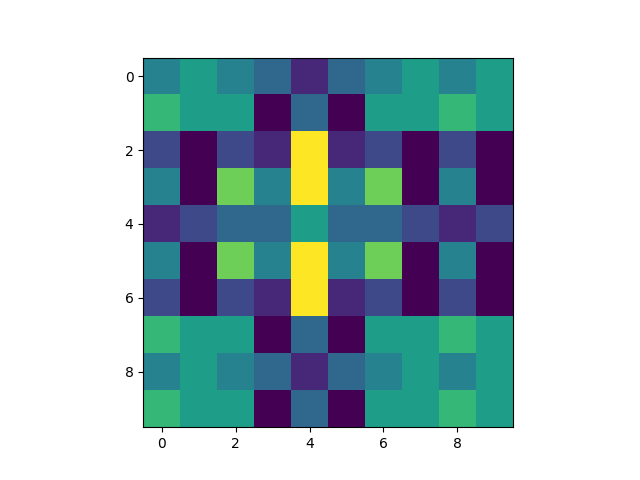

In [9]:
plt.figure()
plt.imshow(copied)

## Convolution (naive)

In [10]:
def convolve(image, kernel):
    kwidth = kernel.shape[0]
    kheight = kernel.shape[1]
    kxcenter = kwidth // 2
    kycenter = kheight // 2
    convolved = np.zeros(image.shape)
        
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            for kx in range(-(kwidth//2), kwidth//2+1):
                for ky in range(-(kheight//2), kheight//2+1):
                    convolved[x,y] += image[x+kx,y+ky] * kernel[kxcenter+kx,kycenter+ky]
    return convolved

In [11]:
convolved = convolve(bordered, kernel)

In [12]:
np.allclose(convolved, expected)

True

<IPython.core.display.Javascript object>


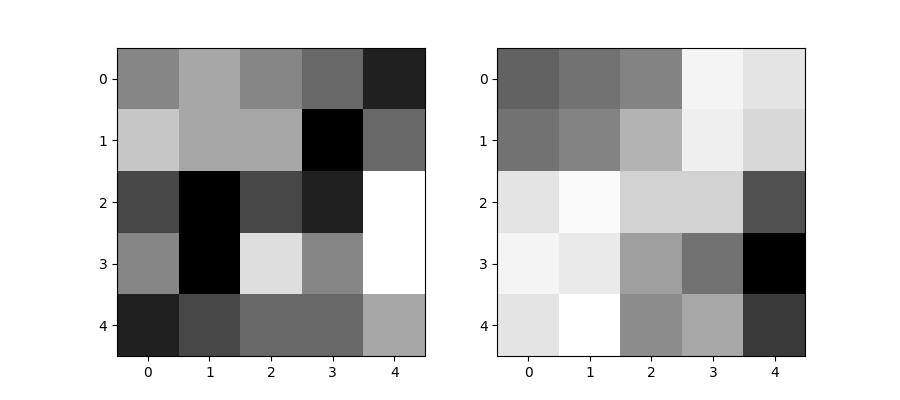

In [13]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.imshow(image, cmap=plt.get_cmap('Greys_r'))
plt.subplot(122)
plt.imshow(convolved, cmap=plt.get_cmap('Greys'))

## Figure out the Fourier implementation...

In [14]:
meh = imageio.imread('/home/aalvarez/Pictures/meh.png')[:,:]
meh.shape

(375, 500)

In [15]:
meh_border = BorderStrategyReflect101(meh)
meh_conv = convolve(meh_border, np.ones((5,5)))

<IPython.core.display.Javascript object>


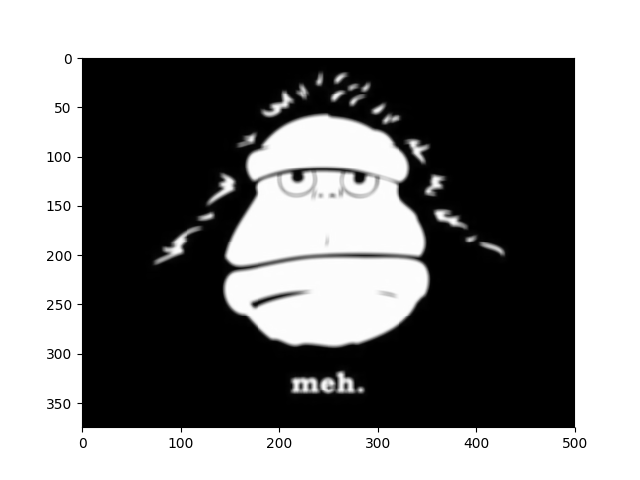

In [16]:
plt.figure()
plt.imshow(meh_conv, cmap=plt.get_cmap('Greys_r'))

In [18]:
from scipy.fftpack import fft2
from matplotlib import colors

In [19]:
meh_fourier = np.fft.fft2(meh)

<IPython.core.display.Javascript object>


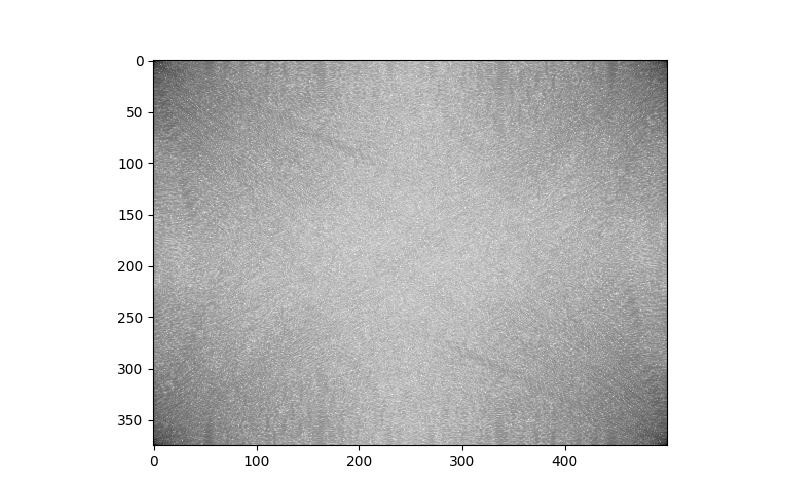

In [20]:
plt.figure(figsize=(8,5))
plt.imshow(np.abs(meh_fourier), norm=colors.LogNorm(), cmap=plt.get_cmap('Greys'))

<IPython.core.display.Javascript object>


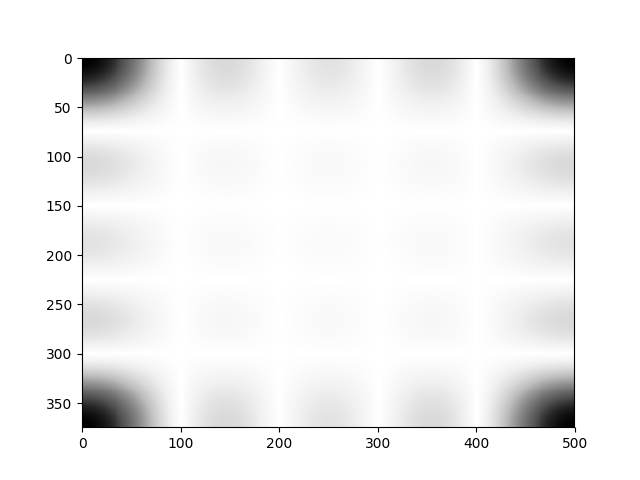

In [21]:
plt.figure()
plt.imshow(np.abs(np.fft.fft2(np.ones((5,5)), s=meh.shape)), cmap=plt.get_cmap('Greys'))

In [22]:
apply = np.multiply(meh_fourier, np.fft.fft2(np.ones((5,5)), s=meh.shape))

<IPython.core.display.Javascript object>


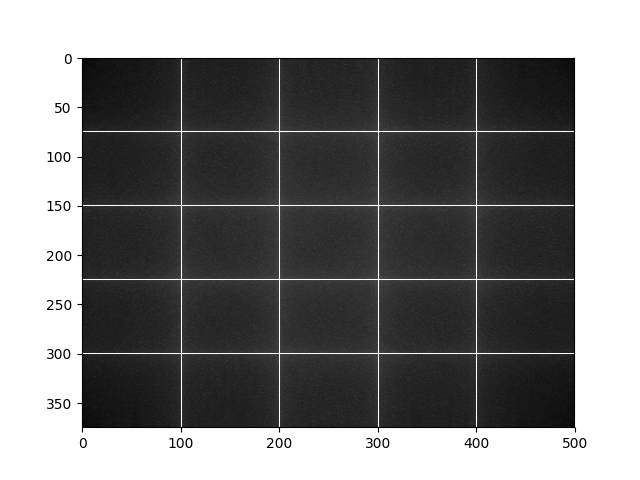

In [23]:
plt.figure()
plt.imshow(np.abs(apply), norm=colors.LogNorm(), cmap=plt.get_cmap('Greys'))

In [24]:
back = np.fft.ifft2(apply)

<IPython.core.display.Javascript object>


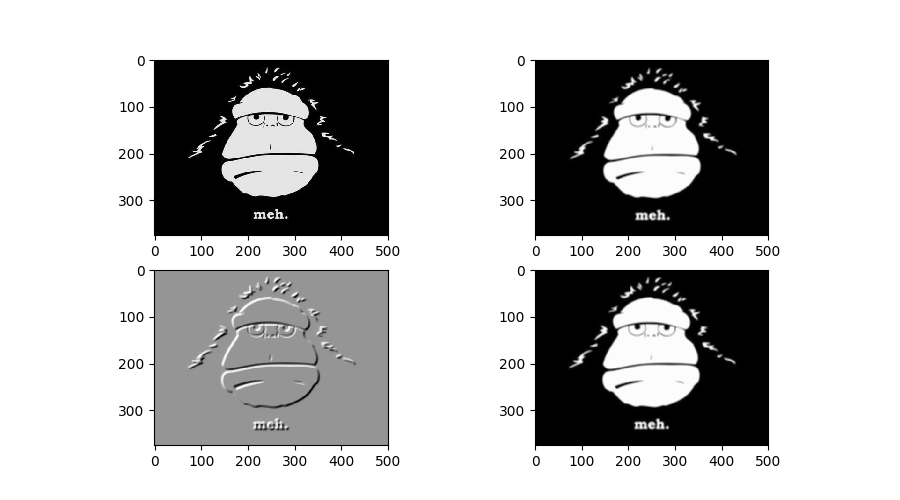

In [25]:
plt.figure(figsize=(9, 5))
ax = plt.subplot(221)
plt.imshow(meh / np.sum(meh), cmap=plt.get_cmap('Greys_r'))
plt.subplot(222, sharex=ax, sharey=ax)
plt.imshow(np.abs(back)/np.sum(np.abs(back)), cmap=plt.get_cmap('Greys_r'))
plt.subplot(224, sharex=ax, sharey=ax)
plt.imshow(meh_conv / np.sum(meh_conv), cmap=plt.get_cmap('Greys_r'))
plt.subplot(223, sharex=ax, sharey=ax)
plt.imshow(meh_conv/np.sum(meh_conv) - np.abs(back)/np.sum(np.abs(back)), cmap=plt.get_cmap('Greys_r'))

## Try with the original

Note: the center coords may be used to get the offset on the result??

In [26]:
kernel2 = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 4.0, 0.0, 0.0],
    [0.0, 8.0, 5.0, 1.0, 1.0],
    [0.0, 0.0, 1.0, 2.0, 3.0],
    [0.0, 0.0, 1.0, 2.0, 3.0]])

In [27]:
import scipy.ndimage as ndimage

In [28]:
xpad, ypad = kernel2.shape[0]//2, kernel2.shape[1]//2

In [29]:
copied = np.zeros((image.shape[0]+xpad*2, image.shape[1]+ypad*2))
for x in range(copied.shape[0]):
    for y in range(copied.shape[1]):
        copied[x,y] = bordered[x-xpad,y-ypad]

In [30]:
copied

array([[0.3, 0.1, 0.3, 0.1, 0.3, 0.2, 1. , 0.2, 0.3],
       [0.6, 0.6, 0.7, 0.6, 0.6, 0.1, 0.4, 0.1, 0.6],
       [0.5, 0.6, 0.5, 0.6, 0.5, 0.4, 0.2, 0.4, 0.5],
       [0.6, 0.6, 0.7, 0.6, 0.6, 0.1, 0.4, 0.1, 0.6],
       [0.3, 0.1, 0.3, 0.1, 0.3, 0.2, 1. , 0.2, 0.3],
       [0.8, 0.1, 0.5, 0.1, 0.8, 0.5, 1. , 0.5, 0.8],
       [0.4, 0.3, 0.2, 0.3, 0.4, 0.4, 0.6, 0.4, 0.4],
       [0.8, 0.1, 0.5, 0.1, 0.8, 0.5, 1. , 0.5, 0.8],
       [0.3, 0.1, 0.3, 0.1, 0.3, 0.2, 1. , 0.2, 0.3]])

In [31]:
# Padded, and recentered circularly
kernel2_shifted = np.array([
    [5.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0],
    [1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
])

In [32]:
prod=np.multiply(np.fft.fft2(copied), np.fft.fft2(kernel2_shifted))

In [33]:
back=np.real(np.fft.ifft2(prod))

In [34]:
back

array([[10.6, 11.6, 10. ,  8.1,  9.8, 13.3, 15.4, 11.8, 16. ],
       [13.5, 15.4, 14.3, 13.5,  9.9,  8.7,  8.9, 13. , 17.7],
       [14.2, 15.6, 16.3, 15.3, 14.5,  9.3, 11.4, 11. , 15.2],
       [14.5, 16.9, 17.6, 16.7, 13.4, 12. , 12.4,  9.8, 13.4],
       [10.8, 10.6, 11.6, 10.9, 13.8, 17.7, 16. ,  9.8, 12.2],
       [11.3, 12.5, 10.1, 13.5, 15.5, 17.2, 17.4, 16. , 19.2],
       [13.8, 10. , 10.6,  8. , 12.8, 13. , 17.7, 15. , 17.9],
       [13.6, 12.9, 10.5, 10.9, 13.9, 16.7, 21.3, 18. , 20.9],
       [10.3, 10.3,  9. ,  6.7,  8.8, 14.7, 18.1, 12.2, 14.1]])

In [35]:
convolved = ndimage.convolve(image, kernel2, mode='mirror')
convolved

array([[16.3, 15.3, 14.5,  9.3, 11.4],
       [17.6, 16.7, 13.4, 12. , 12.4],
       [11.6, 10.9, 13.8, 17.7, 16. ],
       [10.1, 13.5, 15.5, 17.2, 17.4],
       [10.6,  8. , 12.8, 13. , 17.7]])

In [36]:
np.isclose(back[2:-2:,2:-2], convolved)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [37]:
untitled = imageio.imread('/home/aalvarez/Downloads/stp1.gif')[:,:]

In [38]:
untitled.shape

(256, 256)

<IPython.core.display.Javascript object>


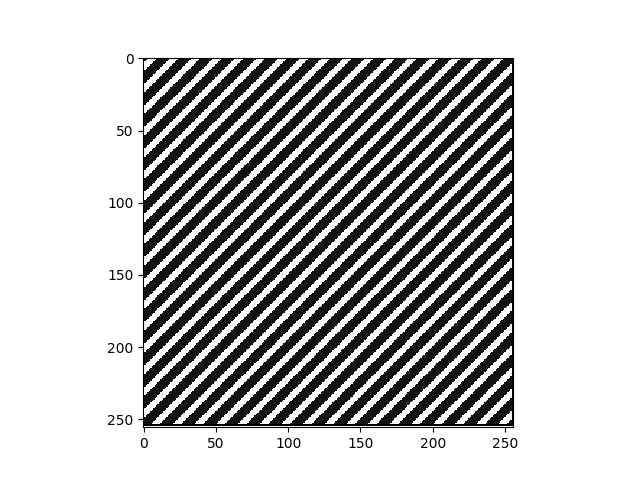

In [39]:
plt.figure()
plt.imshow(untitled, cmap=plt.get_cmap('Greys_r'))

<IPython.core.display.Javascript object>


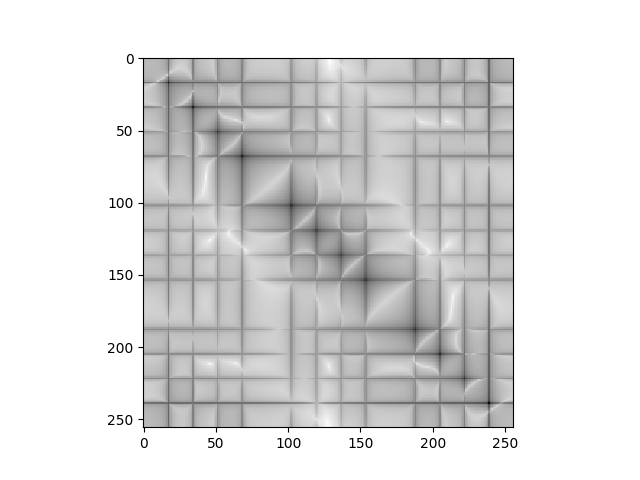

In [61]:
plt.figure()
plt.imshow(np.abs(np.fft.fft2(untitled)), cmap=plt.get_cmap('Greys'), norm=colors.LogNorm())